# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The default agent.py code launches a window that allows us to view the grid world in which the the smartcab lives. The smartcab does not appear to be capable of taking any actions. During each update of the world, the smartcab remains idle at the same intersection. The agent currently receives rewards based soley on how it's action - idling - are appropriate for the state of the world being updated around it. When the light is red, "idle" is the appropriate response on the smartcab is rewarded. When the light is green but there is oncoming traffic, "idle" is an appropriate response (in the situation in which the cab needs to make a left turn), and in the default agent.py, the smartcab is rewarded. When the light is green and there is no oncoming traffic the agent is given a negative reward. Going forward, it looks like we will need to give the agent the ability to take some actions.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

*agent.py*: 1. learning, 2. testing, and 3. epsilon
1. learning: The learning flag is set in the call to agent and determines whether the agent is attempting to learn. When learning flag is set to True, the agent uses Q-learning to learn how to navigate the environment. When set to True, the epsilon and alpha values are displayed in pygame visualizaiton of the simulation.
2. testing: The testing flag is used to switch the simulation to testing mode after training trials have been completed. In testing mode, epsilon and alpha are set to 0.
3. epsilon: Epsilon is set in the call to agent. It is the random exploration factor. During learning trials, the agent chooses a random action with epsilon probabilty.

*Being the curious type I investigated all the flags...*
4. alpha: Alpha is the learning factor. It is a float and is set in the call to agent.
5. Verbose: the verbose flag can be set to either True or False in the call to Environment. When True, the output of the simulation function prints more information regarding the current state of the agent including the location, heading, action, and reward of the agent for the preceding time step, along with information about the state during the time step. The state of traffic light, oncoming traffic, traffic violations made by the agent, which direction the waypoint is, action taken by the agent, time till deadline, and the reward for that time step are displayed. When the verbose is set to False (which is the default) a one sentence summary of the agent's action, the traffic at the intersection along with the resulting reward are stated. Additionally, the program indicates whether the agent is being enforced to meet the deadline.
6. num_dummies: the num_dummies flag is an integer value that can be set in the call to Environment and sets how many cars are on the road with the agent.
7. grid_size: is set in the call to Environment. The grid_size is a tuple (indicating the number of columns and rows) which set the size of the agent's world.
8. enforce_deadline: The enforce_deadline flag can be set to True or False (default). When True, the agent must reach the destination before "time" runs out. The deadline flag also causes an additional penalty to be added to the reward which changes based on the time remaining. If the agent does not reach the destination in time, the fails that particular trial. When False, there is no specified amount of time in which the agent is expected to reach it's destination. However, there is a hard deadline of time steps to prevent infinitely long simulation trials. The hard_time_limit can be accessed and changed in the Environment module.
9. update_delay: The update_delay flag regulates how much time passes between each action taken by the agent. Default is 2.0 seconds, which is enough time to read the printouts and follow along with the visualization. 
10. display: controls whether the pygame GUI is displayed or not.
11. Log_metrics: when True, the simulation results are saved to a file in the logs folder.
12. optimized: when True the default log file name is changed so that files created during learning are saved to a different filename. The learning flag needs to be True for this to take effect.
13. tolerance: sets the value that epsilon must be less than in order to start the testing trials. During training trials, epsilon decays towards zero as the agent learns. Once epsilon is less than tolerance, the simulator.py file switches to testing mode.
14. n_test: the number of testing trials to be completed after the tolerance is met. 

The act function in Environment.py is called when the agent performs an action.

In the simulator.py Python file, what is the difference between the render_text() function and the render() function?
- the render_text() function displays the results of the simulation as text in the console window and the render() function displays the simulation using the pygame GUI.

In the planner.py Python file, will the next_waypoint() function consider the North-South or East-West direction first?
- the next_waypoint() function considers the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


visuals.py:74: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  data['average_reward'] = pd.rolling_mean(data['net_reward'] / (data['initial_deadline'] - data['final_deadline']), 10)
visuals.py:75: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  data['reliability_rate'] = pd.rolling_mean(data['success']*100, 10)  # compute avg. net reward with window=10
visuals.py:78: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  (data['initial_deadline'] - data['final_deadline']), 10)
visuals.py:80: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  (data['initial

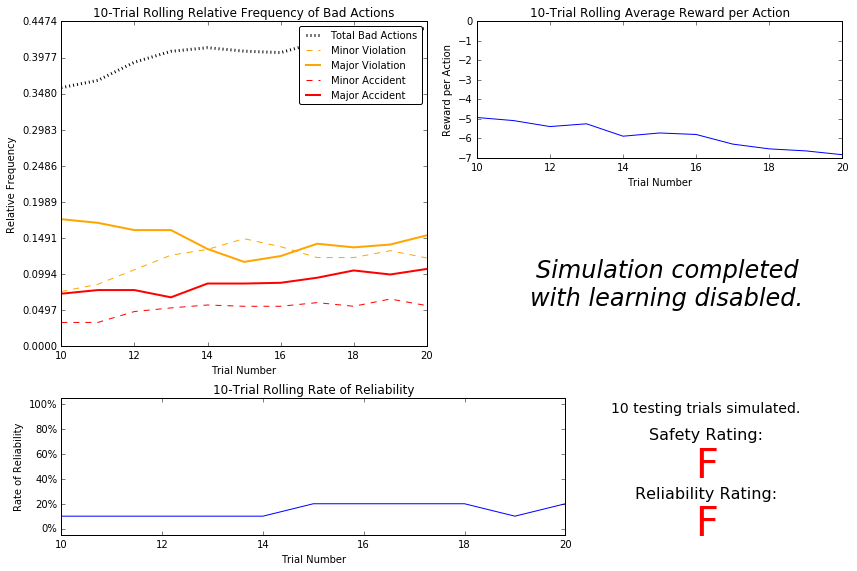

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer**
Initial training and testing was performed using an agent which chooses actions at random in both the learning and testing phases. The agent is unable to learn from actions. These results were achieved with a grid_size set to (7,4).

As might be expected, a driver which chooses actions at random is involved in a high number or traffic accidents and violations. All major and minor traffic acidents and violations are considered bad actions. Overall, the relative frequency of bad actions increases increases from about 0.34 to almost 0.44. Almost half the actions are bad actions. Major traffic accidents and minor traffic violations each account for approximately one-fourth of the total bad actions, major traffic violations account for about half to one-third of bad actions. Minor traffic accidents account for the remaining one-eight or so bad decisions.

The rate of reliability is low, never exceeding 20%. I'm actually suprised that the agent was ever able to randomly make it to the destination. That may partly be due to reducing the size of the world during the simulation, as I set the grid_size flag to (7,4) in order to see the whole visual simulation on my screen. The smaller world means there are less potential pick up and drop off points, making it more likely that agent is able to reach the destination in time.

The agent's inability to learn is clearly demonstrated by the graph showing average reward per action. The agent's reward is getting more negative over time, indicating the agent is makig worse decisions as the simulation goes on. This agrees with the increase in total frequency of bad decisions described above.

It is interesting that there is a trend for increasing frequency of bad decisions given that the agent is randomly performing actions in all the trials. Qualitatively, the agent's performance goes from bad to worse with regards to safety and decision making. However, there is no drastic change in the rate of reliability as the number of trials increaes. I would not expect any of these metrics to get better or worse over trials due to the random nature of the agent.

NO! This smartcab is certainly not safe! It got 'F' ratings for both safety and reliability. I would never get into a cab that gets involved in major traffic accident a fourth of the time!

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

The sensor input is the most relevant feature for learning safety. The inputs are necessary to ensure that the agent follows appropriate traffic regulations and avoids accidents with other cars. 

The waypoint feature is needed to make the agent effecient and encourage the agent to move towards the destination. Without knowing what direction the target is, the agent would only safely, randomly drive though the environment. 

The deadline feature is not needed to decide which action to take. The rewards are decided on based only on whether a valid action was taken based on the state and if the action took the agent toward the destination. There is no change in the reward based on how much time is remaining till the deadline. If the deadline is included, the agent could learn (depending on the implementation) to value quickly getting to the deadline and become a more dangerous driver in regards to traffic violations. From what I've seen in the videos for this section, the gamma factor would be necessary to implement deadline as a feature.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The features are:
1. waypoint: possible values are forward, left, right
2. inputs: 
    - light: red, green
    - left: could be left, right, forward, None
    - right: could be left, right, forward, None
    - oncoming: right, forward,left, None

That means there are 3 waypoint states x (2x4x4x4) input states. So there are 384 states.

In the default state, there are 19 trials per round, so there would need to be 1728/19= ~91 trials to get each possible state, if each state only occured once. That is not very likely, but 91 trials doesn't seem like very many training opportunities, especially considering that supervised and unsupervised learning algorithms are fed tens of thousands to millions of learning examples to get optimal performance. Based on that I think it is reasonable for the agent to learn all possible states in a reasononable amount of training trials.

144

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

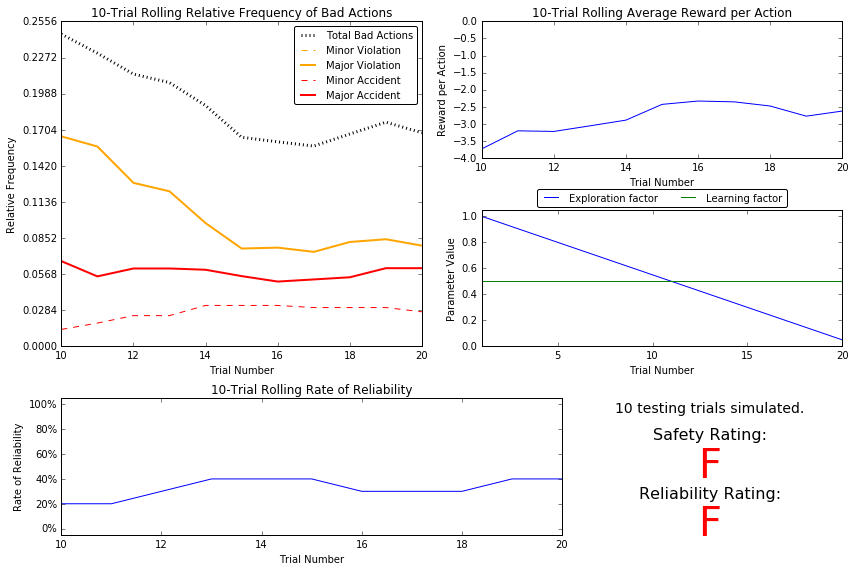

In [42]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

After initial Q-learning implentation the agent failed both the safety and reliability ratings, as occured when the agent randomly navigated through the environment. However, in this instance the agent did show a trend toward making less bad actions over the courese of the second 10 training trials. Additionallly, the agent made bad actions at a lower frequency. At the tenth trial, the agent performed bad actions about 1/4 of the time compared to 1/3 of the time during the random action implementation. By the 20th trial, the bad actions were occuring about 1/6 of the time, compared to almost 1/2 of the time during the random action implementation. The number of minor and major traffic accidents occur with roughly the same frequency between the 10th and 20th testing trial. Both of these metrics occur with a lower frequency than was seen in the random action implementation. The frequency of major traffic violations decreases throughout the testing 10 testing trials shown in the graph; and the frequency during a given trial is always lower in this implementation compared to the previous implementation. Curiously, it appears as if the agent does not make any minor traffic violations.

Throughout the testing period, the average reward acheived by the agent increases, suggesting it is learning.

The epsilon decays at a linear rate, as expected. After each trial the epsilon decreases by 0.05 and so reaches the tolerance level after 20 training trials. 

The rolling reliability rating shows that there is trend for greater reliability as the number of trials increases.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

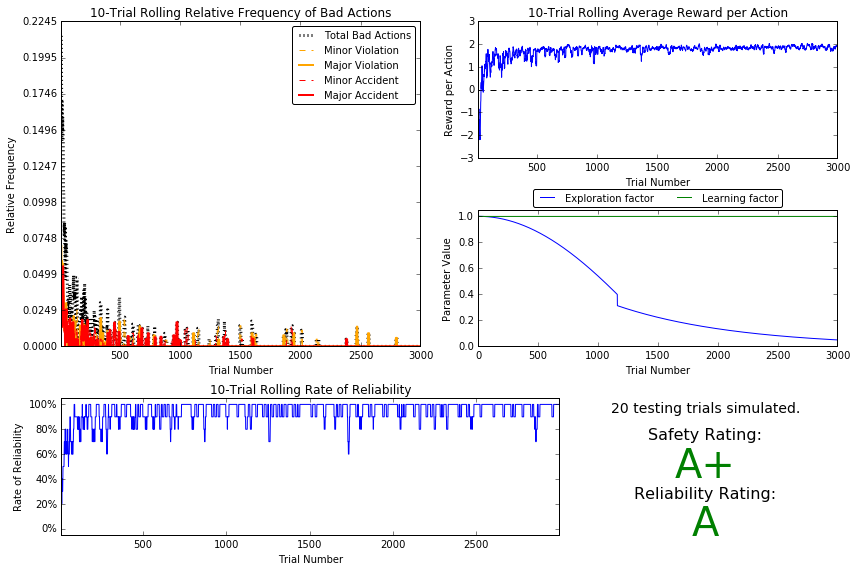

In [44]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
Changed epsilon function to e = a^t, a=0.99: safety = F, reliabilty = A, 300 training trials

Changed epsilon function to e = cos(at), a = 0.001: safety = A+, reliability = F, ~1500 training trials

Combined the cos() decay and the exponential decay function into one:

if self.trial == 0 and testing != True:
            self.counter = self.counter + 1
            
            if self.epsilon < 0.4:
                self.epsilon = self.alpha**self.counter
            
            elif self.epsilon >= 0.4:
                
                self.epsilon = numpy.cos((1-self.alpha)*self.counter) #cos decay function
with an alpha of 0.999.

I ultimately used the combind function above which gave me the best rating, but took almost 3000 training trials. The cos() part of the decay function allows for more exploration throughout the beginning of the learning period. The a^t function then takes over at lower levels of alpha to give the agent time to "practice" what was learned in the first half of the training period. My though is that by combining the two functions the safety and reliability benefits of each decay function are realized.

I used a learning rate that fit the goal of preserving plenty of trials for exploration and plenty of trials in which the like agent was not likely to choose a random action during the second half of the training session. I kept the epsilon tolerance at the default of 0.05, although lowering it might give better results because it would extend the training time. The a^t decay function seems to have a greater effect on reliability, so maybe a lower epsilon tolerance would allow for an A+ reliability rating.

This Q-learner performed much better than the default learner and is able to safely and reliably get a passenger to their destination. I think these results are indicative of a correctly learned policy. I would like to improve the reliabilty rating before deploying this agent in the real world. I don't think safety is top priority of the passengers. People won't use the service because it's safe, they'll use it because it gets them to there destination on time. The safety is implied and expected.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Ex 1: (('forward', ('red', 'forward', 'left', 'right'))
 -- forward : -10.85
 -- right : -0.04
 -- None : 0.00
 -- left : -10.84

Ex 2: ('right', ('green', 'left', 'forward', None))
 -- forward : -0.20
 -- right : 0.00
 -- None : 0.00
 -- left : 0.64

Ex 3: ('left', ('green', None, 'forward', 'left'))
 -- forward : 0.00
 -- right : -0.08
 -- None : -4.22
 -- left : 1.60

In example 1, the state is such that the destination is forward, the light is red, traffic the left is moving forward, traffic from the right is turning left and oncoming traffic is turning right. In this situation, the light is red so the agent should take no action. The action with the highest reward is 'None'. This is an appropriate action because the agent should idle at the light. The turn right option is only slightly negatively rewarded which could be because turning right does not get the agent any closer to the destination.

In example 2, the state is such that the destination is to the right, the light is green, traffic from the left is turning left, traffic from the right is driving forward, and there is no oncoming traffic. Because the destination is to the right, the agent should turn right. However, the agent has somehow learned to turn left away from the destination.

In example 3, the destination is to the left, the light is green, there is no traffic from the left, traffic from the right is driving straight, and oncoming traffic is turning left. Because the light is green and oncoming traffic is also turning left, the agent should turn left. This is the optimal policy that agent found in this situation as well.

Investigation of the policies the agent has learned suggests that additional training would improve the efficiency of the agent. One way to do that would be to reduce the alpha to smaller than 0.01 during the part of the training using the cos() decay function. This could give the agent more trials to try random actions which may lead to it selecting a correct action in the state shown in example 2.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.